In [16]:
# Save cleaned dataset with engineered features
df_features.to_csv('../data/top14_players_clean_with_features.csv', index=False, sep=';')

print("Dataset saved: data/top14_players_clean_with_features.csv")
print(f"\nFinal dataset shape: {df_features.shape}")
print(f"   - {df_features.shape[0]} observations")
print(f"   - {df_features.shape[1]} features (35 original + 7 engineered)")
print(f"\n Ready for machine learning with 3 target variables:")
print("   1. points_per_match")
print("   2. tries_per_match")
print("   3. tackles_per_match")

Dataset saved: data/top14_players_clean_with_features.csv

Final dataset shape: (196, 42)
   - 196 observations
   - 42 features (35 original + 7 engineered)

 Ready for machine learning with 3 target variables:
   1. points_per_match
   2. tries_per_match
   3. tackles_per_match


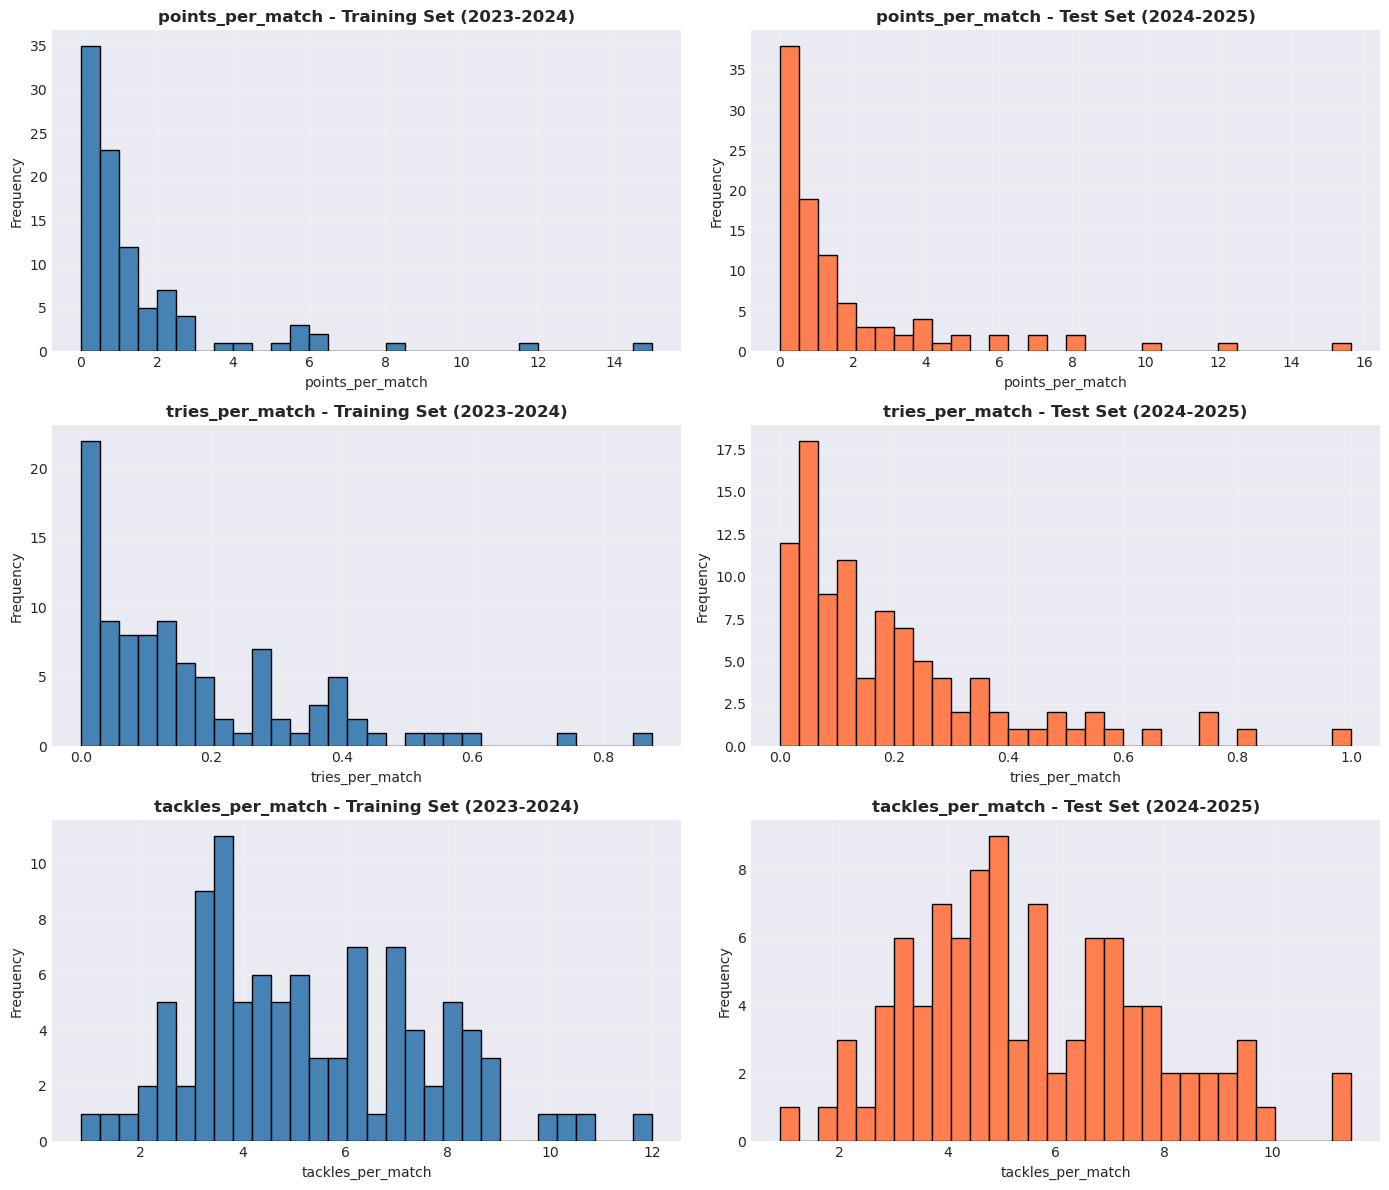

Target Variables Statistics

  POINTS_PER_MATCH

  Training set (2023-2024):
    Mean: 1.53 | Std: 2.40
    Min: 0.00 | Max: 15.00

  Test set (2024-2025):
    Mean: 1.82 | Std: 2.69
    Min: 0.00 | Max: 15.64
------------------------------------------------------------

  TRIES_PER_MATCH

  Training set (2023-2024):
    Mean: 0.17 | Std: 0.18
    Min: 0.00 | Max: 0.88

  Test set (2024-2025):
    Mean: 0.20 | Std: 0.20
    Min: 0.00 | Max: 1.00
------------------------------------------------------------

  TACKLES_PER_MATCH

  Training set (2023-2024):
    Mean: 5.34 | Std: 2.27
    Min: 0.82 | Max: 12.00

  Test set (2024-2025):
    Mean: 5.57 | Std: 2.18
    Min: 0.91 | Max: 11.45
------------------------------------------------------------


In [15]:
# Visualize the 3 target variables
target_vars = ['points_per_match', 'tries_per_match', 'tackles_per_match']

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for i, target in enumerate(target_vars):
    # Training set (2023-2024)
    axes[i, 0].hist(train_data[target].dropna(), bins=30, color='steelblue', edgecolor='black')
    axes[i, 0].set_title(f'{target} - Training Set (2023-2024)', fontweight='bold')
    axes[i, 0].set_xlabel(target)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].grid(alpha=0.3)
    
    # Test set (2024-2025)
    axes[i, 1].hist(test_data[target].dropna(), bins=30, color='coral', edgecolor='black')
    axes[i, 1].set_title(f'{target} - Test Set (2024-2025)', fontweight='bold')
    axes[i, 1].set_xlabel(target)
    axes[i, 1].set_ylabel('Frequency')
    axes[i, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics for each target
print("Target Variables Statistics\n" + "="*60)
for target in target_vars:
    print(f"\n  {target.upper()}")
    print(f"\n  Training set (2023-2024):")
    print(f"    Mean: {train_data[target].mean():.2f} | Std: {train_data[target].std():.2f}")
    print(f"    Min: {train_data[target].min():.2f} | Max: {train_data[target].max():.2f}")
    
    print(f"\n  Test set (2024-2025):")
    print(f"    Mean: {test_data[target].mean():.2f} | Std: {test_data[target].std():.2f}")
    print(f"    Min: {test_data[target].min():.2f} | Max: {test_data[target].max():.2f}")
    print("-" * 60)

In [14]:
# Split data by season for temporal validation
train_data = df_features[df_features['season'] == '2023-2024'].copy()
test_data = df_features[df_features['season'] == '2024-2025'].copy()

print("Train/Test Split (Temporal Validation)")
print(f"\nTraining set (2023-2024): {train_data.shape[0]} players")
print(f"Test set (2024-2025): {test_data.shape[0]} players")

# Check if we have the same players in both seasons
train_players = set(train_data['player_name'].unique())
test_players = set(test_data['player_name'].unique())
common_players = train_players.intersection(test_players)

print(f"\nPlayers appearing in both seasons: {len(common_players)}")
print(f"   Only in 2023-2024: {len(train_players - test_players)}")
print(f"   Only in 2024-2025: {len(test_players - train_players)}")

# This is important: for true prediction, we need players in both seasons
print(f"\nWe can predict performance for {len(common_players)} players")

Train/Test Split (Temporal Validation)

Training set (2023-2024): 97 players
Test set (2024-2025): 99 players

Players appearing in both seasons: 97
   Only in 2023-2024: 0
   Only in 2024-2025: 2

We can predict performance for 97 players


In [13]:
# Feature Engineering - Create derived variables
df_features = df_clean.copy()

# Performance per match (normalize by matches played)
df_features['points_per_match'] = df_features['points_scored'] / df_features['matches_played']
df_features['tries_per_match'] = df_features['tries'] / df_features['matches_played']
df_features['tackles_per_match'] = df_features['tackles_made'] / df_features['matches_played']
df_features['meters_per_match'] = df_features['meters_carried'] / df_features['matches_played']

# Efficiency metrics
df_features['meters_per_carry'] = df_features['meters_carried'] / (df_features['carries'] + 1)  # +1 to avoid division by zero
df_features['minutes_per_match'] = df_features['minutes_played'] / df_features['matches_played']
df_features['tackle_efficiency'] = df_features['tackles_made'] * df_features['tackle_success_rate'] / 100

print("Feature engineering completed!")
print(f"\nNew dataset shape: {df_features.shape}")
print(f"\nNew features created:")
print("  - points_per_match")
print("  - tries_per_match")
print("  - tackles_per_match")
print("  - meters_per_match")
print("  - meters_per_carry")
print("  - minutes_per_match")
print("  - tackle_efficiency")

# Display sample
df_features[['player_name', 'season', 'points_per_match', 'tries_per_match', 
             'tackles_per_match', 'meters_per_match']].head(10)

Feature engineering completed!

New dataset shape: (196, 42)

New features created:
  - points_per_match
  - tries_per_match
  - tackles_per_match
  - meters_per_match
  - meters_per_carry
  - minutes_per_match
  - tackle_efficiency


,player_name,season,points_per_match,tries_per_match,tackles_per_match,meters_per_match
0,Antoine Dupont,2023-2024,2.142857,0.428571,4.428571,78.785714
1,Antoine Dupont,2024-2025,5.000000,1.000000,5.000000,81.666667
2,Romain Ntamack,2023-2024,0.500000,0.000000,3.750000,63.000000
3,Romain Ntamack,2024-2025,3.250000,0.333333,4.666667,38.833333
4,Thomas Ramos,2023-2024,11.923077,0.384615,2.846154,67.923077
5,Thomas Ramos,2024-2025,15.642857,0.285714,2.142857,78.500000
6,Juan Cruz Mallia,2023-2024,5.733333,0.400000,3.466667,71.333333
7,Juan Cruz Mallia,2024-2025,7.187500,0.500000,5.000000,58.687500
8,Matthis Lebel,2023-2024,2.941176,0.588235,1.588235,88.176471
9,Matthis Lebel,2024-2025,0.217391,0.043478,2.652174,54.565217


Analyzing 29 numeric variables
Variables: ['height_cm', 'weight_kg', 'age', 'matches_played', 'matches_started', 'minutes_played', 'points_scored', 'tries', 'penalties_scored', 'penalty_attempts']... (showing first 10)


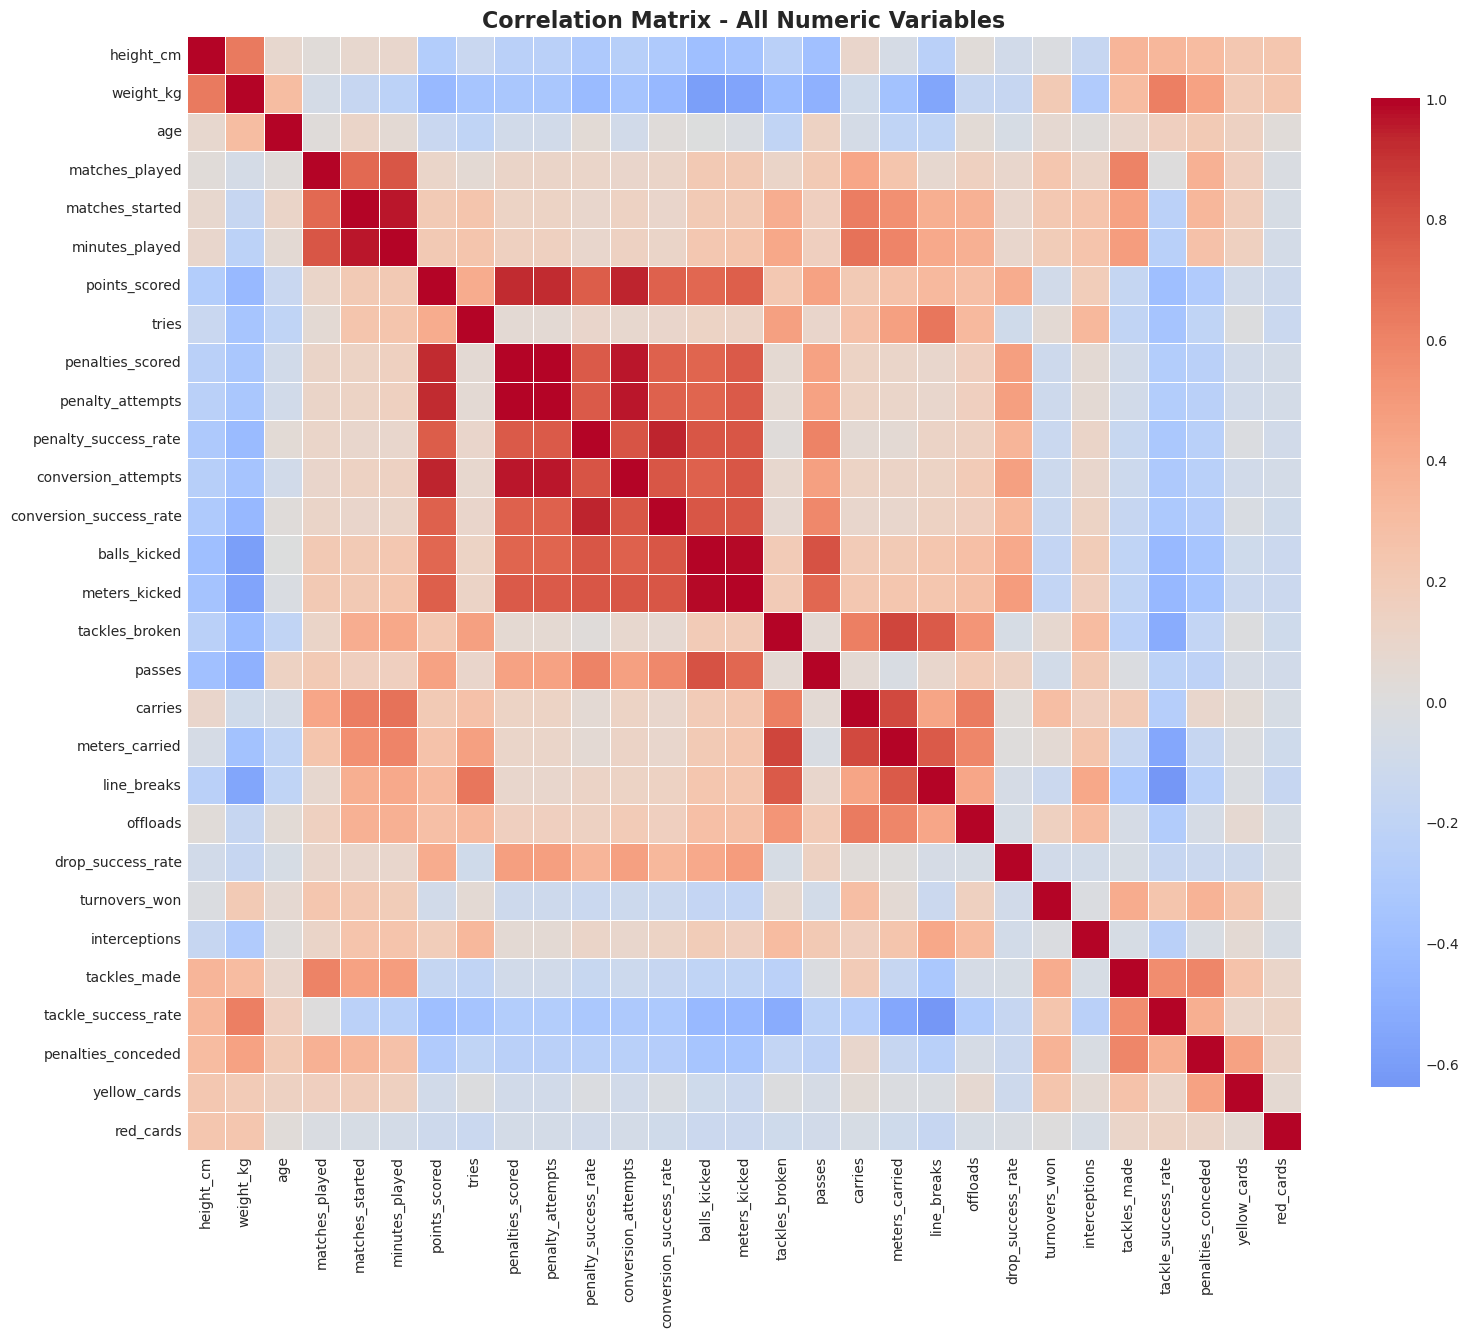

In [12]:
# Correlation matrix - ALL numeric variables
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Remove columns with no variance (if any)
numeric_cols = [col for col in numeric_cols if df_clean[col].std() > 0]

print(f"Analyzing {len(numeric_cols)} numeric variables")
print(f"Variables: {numeric_cols[:10]}... (showing first 10)")

corr_matrix = df_clean[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Numeric Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

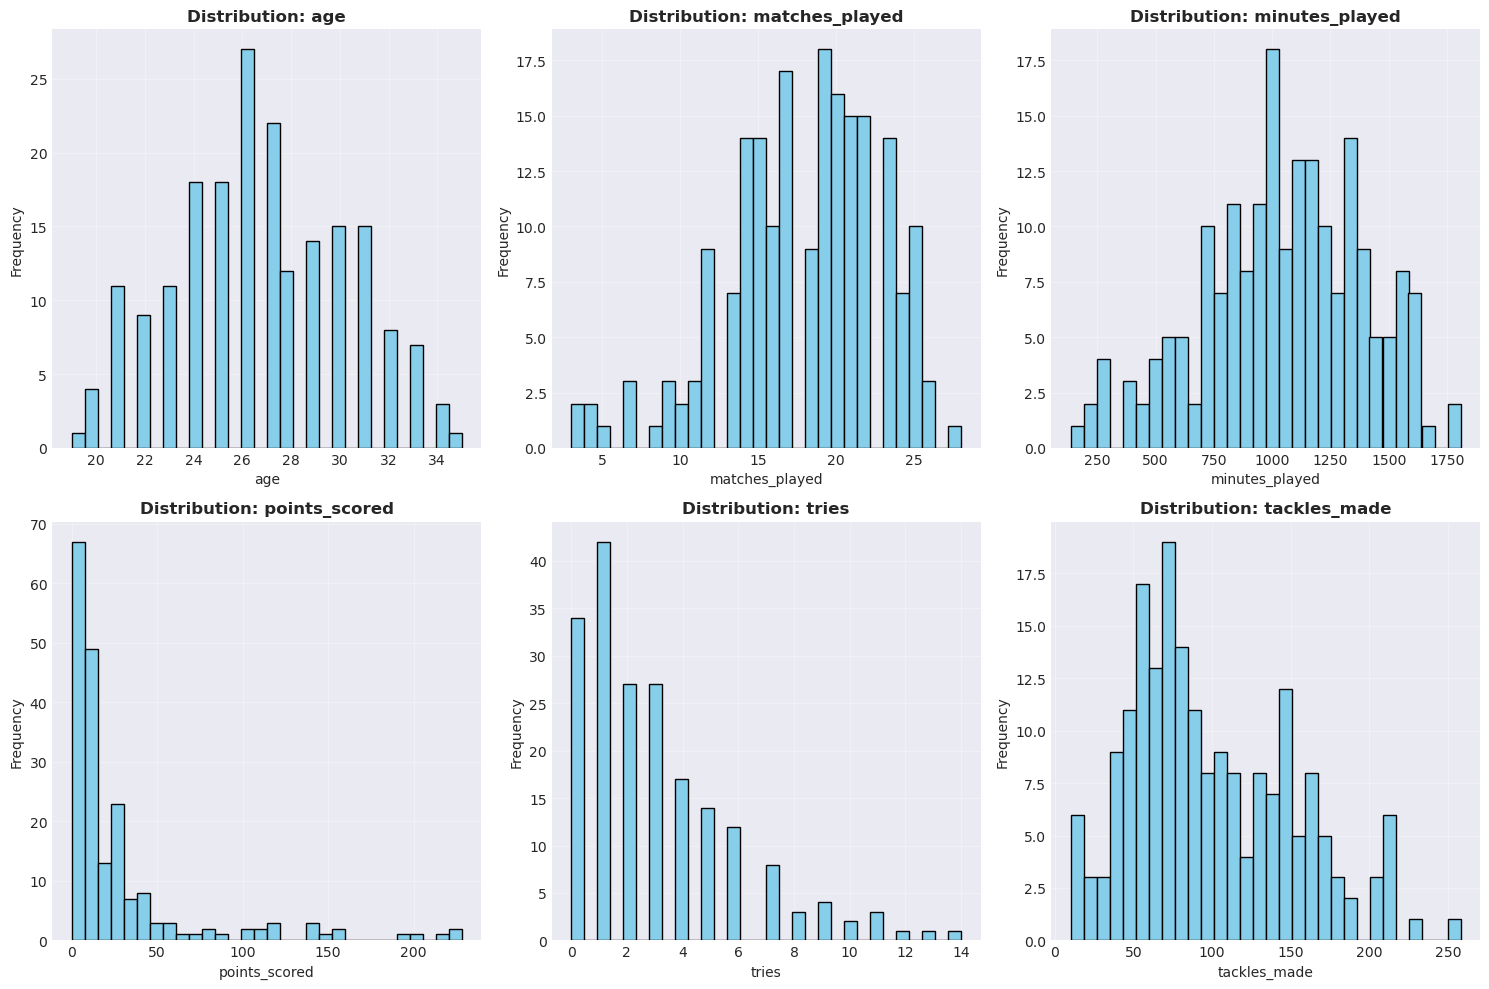

In [11]:
# Key performance variables
key_vars = ['age', 'matches_played', 'minutes_played', 'points_scored', 
            'tries', 'tackles_made']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(key_vars):
    axes[i].hist(df_clean[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution: {col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

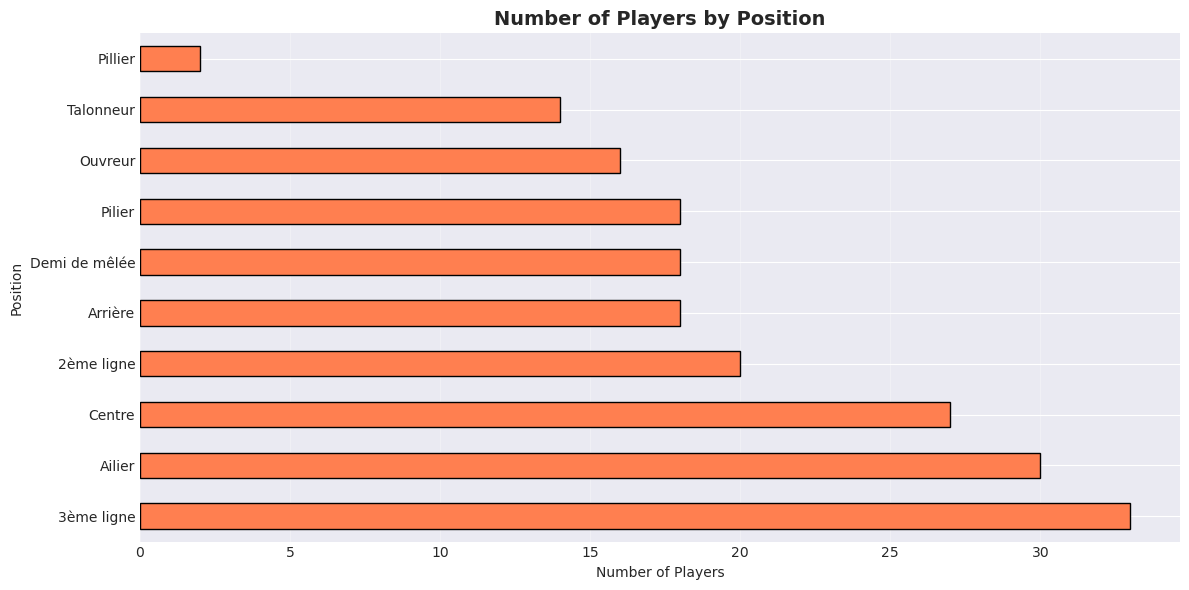


Position distribution:
position
3ème ligne       33
Ailier           30
Centre           27
2ème ligne       20
Arrière          18
Demi de mêlée    18
Pilier           18
Ouvreur          16
Talonneur        14
Pillier           2
Name: count, dtype: int64


In [10]:
# Distribution by position
position_counts = df_clean['position'].value_counts()

plt.figure(figsize=(12, 6))
position_counts.plot(kind='barh', color='coral', edgecolor='black')
plt.title('Number of Players by Position', fontsize=14, fontweight='bold')
plt.xlabel('Number of Players')
plt.ylabel('Position')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nPosition distribution:")
print(position_counts)

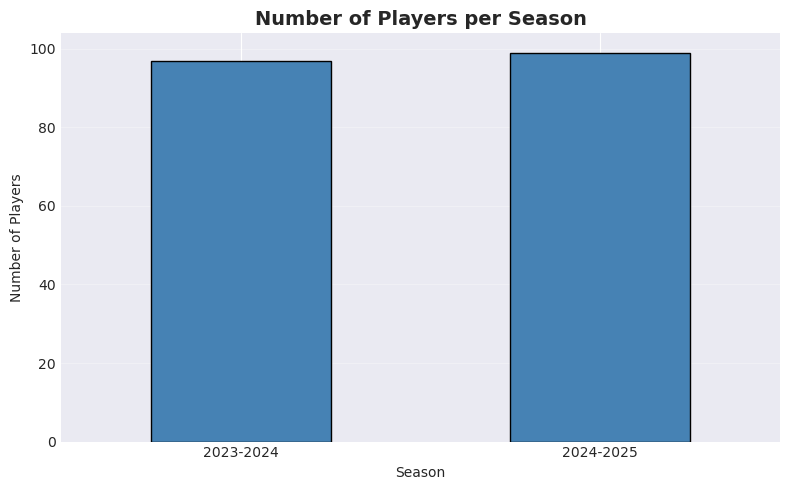

In [9]:
import matplotlib.pyplot as plt

# Distribution by season
season_counts = df_clean['season'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
season_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Players per Season', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Number of Players')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
# Remove players with 0 matches
df_clean = df[df['matches_played'] > 0].copy()

print(f"Dataset cleaned: {df_clean.shape[0]} rows (removed {len(zero_matches)} rows)")
print(f"   Unique players: {df_clean['player_name'].nunique()}")
print(f"   Seasons distribution:")
print(df_clean['season'].value_counts().sort_index())

Dataset cleaned: 196 rows (removed 2 rows)
   Unique players: 99
   Seasons distribution:
season
2023-2024    97
2024-2025    99
Name: count, dtype: int64


In [7]:
# Check for players with 0 matches played
zero_matches = df[df['matches_played'] == 0]
print(f"Players with 0 matches: {len(zero_matches)}")

if len(zero_matches) > 0:
    print("\nDetails:")
    print(zero_matches[['player_name', 'club', 'season', 'matches_played']])

Players with 0 matches: 2

Details:
         player_name              club     season  matches_played
154     Manu Tuilagi  Aviron Bayonnais  2023-2024               0
156  Esteban Capilla  Aviron Bayonnais  2023-2024               0


In [6]:
# Display statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,height_cm,weight_kg,age,matches_played,matches_started,minutes_played,points_scored,tries,penalties_scored,penalty_attempts,penalty_success_rate,conversion_attempts,conversion_success_rate,balls_kicked,meters_kicked,tackles_broken,passes,carries,meters_carried,line_breaks,offloads,drop_success_rate,turnovers_won,interceptions,tackles_made,tackle_success_rate,penalties_conceded,yellow_cards,orange_cards,red_cards
count,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.0,198.000000
mean,185.717172,101.30303,26.727273,17.661616,13.373737,1037.530303,28.666667,3.005051,2.530303,2.530303,12.232323,7.111111,12.883838,28.742424,879.803030,21.222222,132.242424,98.914141,685.217172,5.601010,8.777778,0.909091,2.373737,0.409091,97.702020,73.247475,8.308081,0.550505,0.0,0.045455
std,8.029186,15.83061,3.550415,5.218246,4.870059,362.899416,44.033905,2.884401,7.987083,7.987083,29.649331,20.657167,29.224870,48.495845,1551.411536,16.427077,208.940139,44.690108,423.503347,5.577092,6.901123,5.872747,3.262106,0.780029,52.265887,11.916561,6.006852,0.796550,0.0,0.208827
min,170.000000,75.00000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,180.250000,89.00000,24.000000,15.000000,11.000000,813.250000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,34.000000,67.000000,350.750000,1.000000,4.000000,0.000000,0.000000,0.000000,59.000000,67.000000,4.000000,0.000000,0.0,0.000000
50%,184.000000,99.00000,26.000000,18.500000,14.000000,1052.500000,15.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,97.500000,17.500000,59.500000,95.000000,580.500000,4.000000,7.000000,0.000000,1.000000,0.000000,86.000000,75.000000,7.000000,0.000000,0.0,0.000000
75%,190.000000,112.75000,29.750000,21.750000,17.000000,1312.750000,30.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.500000,914.750000,29.000000,111.500000,126.000000,932.000000,9.000000,12.000000,0.000000,3.000000,1.000000,137.750000,82.000000,11.750000,1.000000,0.0,0.000000
max,203.000000,145.00000,35.000000,28.000000,23.000000,1808.000000,228.000000,14.000000,49.000000,49.000000,144.000000,98.000000,134.000000,223.000000,8482.000000,82.000000,1104.000000,232.000000,2095.000000,26.000000,33.000000,50.000000,28.000000,4.000000,258.000000,93.000000,32.000000,4.000000,0.0,1.000000


In [5]:
# Display dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   player_name              198 non-null    object
 1   club                     198 non-null    object
 2   position                 198 non-null    object
 3   height_cm                198 non-null    int64 
 4   weight_kg                198 non-null    int64 
 5   age                      198 non-null    int64 
 6   nationality              198 non-null    object
 7   season                   198 non-null    object
 8   matches_played           198 non-null    int64 
 9   matches_started          198 non-null    int64 
 10  minutes_played           198 non-null    int64 
 11  points_scored            198 non-null    int64 
 12  tries                    198 non-null    int64 
 13  penalties_scored         198 non-null    int64 
 14  penalty_attempts     

In [4]:
# Display first 10 rows
df.head(10)

,player_name,club,position,height_cm,weight_kg,age,nationality,season,matches_played,matches_started,minutes_played,points_scored,tries,penalties_scored,penalty_attempts,penalty_success_rate,conversion_attempts,conversion_success_rate,balls_kicked,meters_kicked,tackles_broken,passes,carries,meters_carried,line_breaks,offloads,drop_success_rate,turnovers_won,interceptions,tackles_made,tackle_success_rate,penalties_conceded,yellow_cards,orange_cards,red_cards
0,Antoine Dupont,Stade Toulousain,Demi de mêlée,175,85,26,France,2023-2024,14,9,865,30,6,0,0,0,0,0,102,3049,39,561,177,1103,9,31,0,1,0,62,75,4,0,0,0
1,Antoine Dupont,Stade Toulousain,Demi de mêlée,175,85,27,France,2024-2025,3,2,195,15,3,0,0,0,0,0,26,723,14,138,33,245,1,8,0,0,0,15,79,2,0,0,0
2,Romain Ntamack,Stade Toulousain,Ouvreur,186,91,24,France,2023-2024,4,3,254,2,0,0,0,0,3,33,14,459,13,59,27,252,3,0,0,0,0,15,79,2,0,0,0
3,Romain Ntamack,Stade Toulousain,Ouvreur,186,91,25,France,2024-2025,12,12,722,39,4,1,1,100,10,90,53,1463,16,181,53,466,3,6,0,1,0,56,76,3,0,0,0
4,Thomas Ramos,Stade Toulousain,Arrière,178,87,28,France,2023-2024,13,13,914,155,5,20,20,74,72,76,94,3153,36,201,141,883,12,15,0,0,0,37,62,2,0,0,0
5,Thomas Ramos,Stade Toulousain,Arrière,178,87,29,France,2024-2025,14,14,1011,219,4,33,33,84,90,82,88,3000,36,203,126,1099,10,23,0,1,2,30,57,4,1,0,0
6,Juan Cruz Mallia,Stade Toulousain,Arrière,182,89,27,Argentina,2023-2024,15,13,1012,86,6,4,4,66,37,70,54,1561,25,174,108,1070,9,23,0,2,1,52,72,3,1,0,0
7,Juan Cruz Mallia,Stade Toulousain,Arrière,182,89,28,Argentina,2024-2025,16,15,1126,115,8,7,7,77,41,82,68,1952,17,231,130,939,8,12,0,0,0,80,75,7,0,0,0
8,Matthis Lebel,Stade Toulousain,Ailier,184,90,24,France,2023-2024,17,15,1148,50,10,0,0,0,0,0,20,576,51,64,158,1499,19,8,0,0,0,27,61,5,0,0,0
9,Matthis Lebel,Stade Toulousain,Ailier,184,90,25,France,2024-2025,23,18,1478,5,1,0,0,0,0,0,19,499,52,78,137,1255,13,16,0,0,2,61,75,6,1,0,0


In [3]:
# Load the CSV file
df = pd.read_csv('../data/top14_players_progress_final.csv', sep=';')

print(f'Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns')
print(f'   Unique players: {df["player_name"].nunique()}')
print(f'   Seasons: {df["season"].unique()}')

Dataset loaded: 198 rows × 35 columns
   Unique players: 99
   Seasons: ['2023-2024' '2024-2025']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

pd.set_option('display.max_columns', None)

print('Successfully imported bookstores')

Successfully imported bookstores
